In [1]:
import pandas as pd
import neutcurve
from neutcurve.colorschemes import CBMARKERS, CBPALETTE
import matplotlib
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.float_format', '{:.3g}'.format)
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 400)

In [6]:
data = (
    pd.read_excel('neut_data/220711_1C04_5G04_frac_infectivity.xlsx')
    .rename(columns={
        'mAb': 'serum', # neutcurve package refers to all Ab samples as 'sera'
        'concentration': 'concentration'
    })
)

data.head()

,serum,virus,replicate,concentration,fraction infectivity
0,1C04,HK19,1,0.000488,0.932
1,1C04,HK19,1,0.000977,0.813
2,1C04,HK19,1,0.00195,0.728
3,1C04,HK19,1,0.00391,0.548
4,1C04,HK19,1,0.00781,0.361


In [7]:
fits = neutcurve.CurveFits(data)

for serum in fits.sera:
    print(f"Viruses measured against {serum}:\n" +
          str(fits.viruses[serum]))

Viruses measured against 1C04:
['HK19', 'H6']
Viruses measured against 5G04:
['HK19', 'H6']


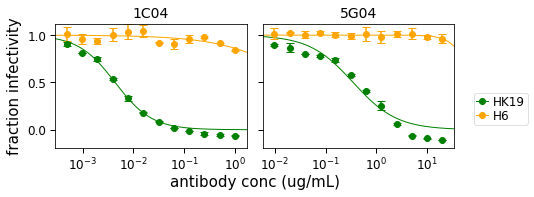

In [10]:
fig, axes = fits.plotSera(ncol=2,
                          xlabel='antibody conc (ug/mL)',
                          virus_to_color_marker={
                              'HK19': ('green', 'o'),
                              'H6': ('orange', 'o')},
                          sharex = False
                         )

bbox = matplotlib.transforms.Bbox([[0, 0], [8.2, 3.5]])
plt.savefig('figures/220711_1C04_5G04_neut-curves.pdf', bbox_inches=bbox)

In [9]:
fits.fitParams(ics=[50,99])

,serum,virus,replicate,nreplicates,ic50,ic50_bound,ic50_str,ic99,ic99_bound,ic99_str,midpoint,slope,top,bottom
0,1C04,HK19,average,2,0.00433,interpolated,0.00433,0.203,interpolated,0.203,0.00433,1.19,1,0
1,1C04,H6,average,2,1,lower,>1,1,lower,>1,23,0.58,1,0
2,5G04,HK19,average,2,0.348,interpolated,0.348,20,lower,>20,0.348,1.01,1,0
3,5G04,H6,average,2,20,lower,>20,20,lower,>20,81.9,2.28,1,0
